# Exploratory Data Analysis


| Data Dictionary | Datatype | Description |
|---------------------------|----------|-------------------------------------------------------------------------------------------------------|
| ssvid | int64 | the vessel's MMSI code which is it's "unique" AIS ID |
| gap_hours | float64 | length of the gap event |
| gap_distance_m | float64 | distance of the gap event in miles |
| gap_implied_speed_knots | float64 |  |
| positions_per_day | float64 |  |
| vessel_class | object | vessel geartype |
| flag | object | The state a vessel is registered or licensed under |
| off_timestamp | object | timestamp AIS was turned off |
| off_msgid | object | message ID from AIS turning off |
| off_lat | float64 | latitude when AIS turned off |
| off_lon | float64 | longitude when AIS turned off |
| off_type | object | the class of AIS device (A or B), Class A devices are more expensive, have stronger signals and broadcast more frequently |
| off_receiver_type | object | whether the AIS message was recieved by a satellite or terrestrial receiver when turned off |
| off_distance_from_shore_m | float64 | distance from shore when AIS turned off |
| on_timestamp | object | timestamp AIS was turned on |
| on_msgid | object | message ID from AIS turning on |
| on_lat | float64 | latitude when AIS turned on |
| on_lon | float64 | longitude when AIS turned on |
| on_type | object | the class of AIS device (A or B), class A devices have stronger signals and broadcast more frequently |
| on_receiver_type | object | whether the AIS message was recieved by a satellite or terrestrial receiver when turned on |
| on_distance_from_shore_m | float64 | distance from shore when AIS turned on |

### Import Packages and Data

In [1]:
# standard data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# import IMO non registered ID list and gap events dataset
imo_notreg = pd.read_csv('./data/imo_notreg.csv')
gap_events = pd.read_csv('./data/raw_sample.csv') 

In [12]:
# check the shape of each dataframe
print(f'Non-Registered Vessels: {len(imo_notreg)}')
print(f'Gap Events: {len(gap_events)}')

Non-Registered Vessels: 79066
Gap Events: 500000


In [13]:
# Check the number of unique values - 43,000
imo_notreg['0'].nunique()

43168

In [14]:
# Confirm highest number of times a vessel appears
imo_notreg['0'].value_counts()

563022450    14
431008005    13
416005616    12
228208700    12
224220130    11
             ..
100899415     1
412479697     1
225985132     1
412283514     1
412352512     1
Name: 0, Length: 43168, dtype: int64

## Exploratory Analysis (Non-Registered Vessels)

This section investigates patterns and relationships among the vessels that did not appear in the IMO database.

In [15]:
# Filter the full gap events dataset to only include the non registered vessels
gap_notreg = gap_events[gap_events['ssvid'].isin(imo_notreg['0'])]
gap_notreg.shape

(346762, 21)

In [17]:
# change ssvid column name for consistency
gap_notreg = gap_notreg.rename(columns={'ssvid':'mmsi'})
gap_notreg.head()

,mmsi,gap_hours,gap_distance_m,gap_implied_speed_knots,positions_per_day,vessel_class,flag,off_timestamp,off_msgid,off_lat,...,off_type,off_receiver_type,off_distance_from_shore_m,on_timestamp,on_msgid,on_lat,on_lon,on_type,on_receiver_type,on_distance_from_shore_m
0,412422839,39.433333,535.624620,0.007334,0.034917,fishing,CHN,2018-11-02T08:32:54Z,ab04ae1f-022d-1cf8-6704-79f5c18f03fe,29.940583,...,B,terrestrial,0.0,2018-11-03T23:59:40Z,d66f5755-1e80-50b7-9c24-97affcd0d30b,29.938277,122.273638,B,terrestrial,1000.0
1,247143160,80.800000,1260.751756,0.008425,2.947519,trawlers,ITA,2018-05-18T18:22:40Z,a08e856c-e011-5dab-8ae8-03a4bf0c7ba1,38.099993,...,A,terrestrial,0.0,2018-05-22T03:11:32Z,97e47f62-0784-5e70-bea4-b57c23dcab63,38.088952,13.540445,A,terrestrial,0.0
2,224231150,15.816667,9683.318918,0.330574,0.115448,set_gillnets,ESP,2018-03-22T11:28:05Z,b4fbb421-1944-5a5f-b3ae-aabb589bb8d3,43.406192,...,B,terrestrial,3000.0,2018-03-23T03:17:34Z,7137847e-305e-5a4f-8b82-ab83b181c4ab,43.354105,-8.375345,B,terrestrial,1000.0
3,413002111,14.433333,2965.614746,0.110945,0.416022,trawlers,CHN,2018-02-28T19:59:57Z,06e02215-e3b7-59ac-8504-f404fc25196c,26.573672,...,A,terrestrial,42000.0,2018-03-01T10:26:32Z,499bb4b5-a209-5f79-9718-ea361000bbdc,26.564128,120.902237,A,terrestrial,44000.0
4,247074840,16.450000,495.809447,0.016275,0.538665,trawlers,ITA,2018-04-25T07:43:16Z,248c64e1-6d7b-5553-bffe-8974fc455332,44.675090,...,A,terrestrial,0.0,2018-04-26T00:10:43Z,5659fa33-6771-584a-95a5-4d35df3f544f,44.675367,12.235438,A,terrestrial,0.0


In [34]:
gap_notreg.describe()

,mmsi,gap_hours,gap_distance_m,gap_implied_speed_knots,positions_per_day,off_lat,off_lon,off_distance_from_shore_m,on_lat,on_lon,on_distance_from_shore_m
count,3.467620e+05,346762.000000,3.467620e+05,346762.000000,344906.000000,346762.000000,346762.000000,3.467540e+05,346762.000000,346762.000000,3.467560e+05
mean,4.134220e+08,125.473019,2.873190e+04,0.414658,11.761397,31.890658,90.835906,1.838358e+04,31.893232,90.844197,1.865638e+04
std,1.803360e+08,429.313197,1.693180e+05,3.504960,41.770756,12.703357,57.082368,7.212948e+04,12.698465,57.077196,7.240180e+04
min,1.114720e+05,12.000000,0.000000e+00,0.000000,0.000000,-89.977667,-179.833372,0.000000e+00,-89.929540,-179.909047,0.000000e+00
25%,2.774402e+08,16.733333,3.407681e+02,0.003546,0.001704,24.832000,109.011728,0.000000e+00,24.840870,109.005823,0.000000e+00
50%,4.124257e+08,30.550000,3.613040e+03,0.044143,0.051323,31.008883,119.521981,2.000000e+03,31.038048,119.530272,2.000000e+03
75%,4.160017e+08,83.016667,1.703127e+04,0.237987,1.785874,37.930020,121.949576,1.300000e+04,37.930048,121.953170,1.300000e+04
max,1.020002e+09,15511.116667,1.919246e+07,617.980208,735.613968,72.965227,179.995645,1.994000e+06,72.889147,179.999600,2.002000e+06


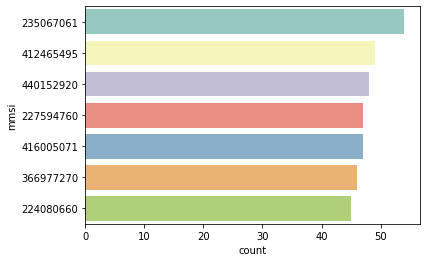

In [33]:
# Which MMSI IDs appear the most in the gap events dataset/how often?
sns.countplot(y="mmsi", data=gap_notreg, palette="Set3",
              order=gap_notreg['mmsi'].value_counts().iloc[:7].index);

In [75]:
# The total timeframe is 2 years
gap_notreg['off_timestamp'].min(), gap_notreg['off_timestamp'].max()

('2018-01-01T00:05:37Z', '2019-12-31T09:48:32Z')

In [76]:
gap_notreg['on_timestamp'].min(), gap_notreg['on_timestamp'].max()

('2018-01-01T12:33:32Z', '2019-12-31T23:58:24Z')

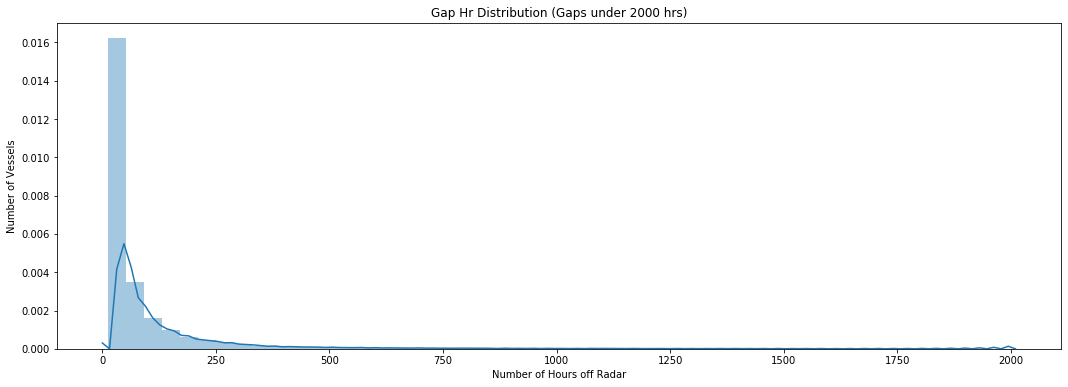

In [51]:
# check the distribution of gap hours

high_gaps = gap_notreg[gap_notreg['gap_hours'] > 2000]
low_gaps = gap_notreg[gap_notreg['gap_hours'] < 2000]

plt.figure(figsize=(18,6))
sns.distplot(low_gaps['gap_hours']).set(xlabel='Number of Hours off Radar', 
                                        ylabel='Number of Vessels', 
                                        title='Gap Hr Distribution (Under 2000 hrs)');

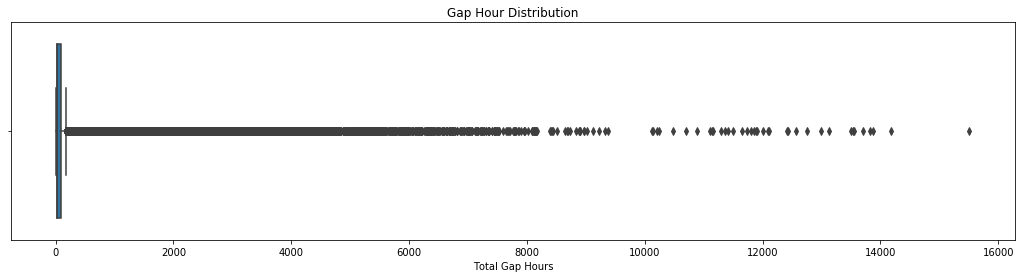

In [56]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x = gap_notreg['gap_hours'], ax=ax).set(xlabel='Total Gap Hours', 
                                                    title='Gap Hour Distribution');

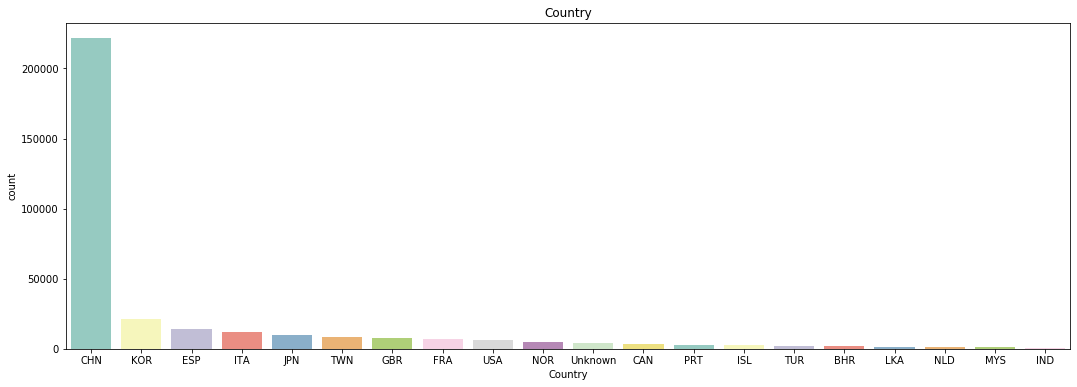

In [67]:
# Which countries have the highest avg gap hours
countries = gap_notreg.groupby('flag')['gap_hours'].mean()

plt.figure(figsize=(18,6))
sns.countplot(x="flag", data=gap_notreg, palette="Set3",
              order=gap_notreg['flag'].value_counts().iloc[:20].index).set(xlabel='Country',
                                                                           title='Country');

In [68]:
# Check for unknown countries
gap_notreg[gap_notreg['flag'] == 'Unknown']

,mmsi,gap_hours,gap_distance_m,gap_implied_speed_knots,positions_per_day,vessel_class,flag,off_timestamp,off_msgid,off_lat,...,off_type,off_receiver_type,off_distance_from_shore_m,on_timestamp,on_msgid,on_lat,on_lon,on_type,on_receiver_type,on_distance_from_shore_m
124,200016091,117.200000,689944.085192,3.178669,4.257678,set_gillnets,Unknown,2018-03-26T22:28:10Z,6e1e6567-2906-5f15-82f2-a0576067682f,18.421942,...,B,satellite,367000.0,2018-03-31T19:40:58Z,8b3fff5d-a3e0-5685-ba2b-dd60f79b472b,22.177273,120.530672,B,terrestrial,14000.0
130,98339957,12.700000,131016.788712,5.570347,28.916213,drifting_longlines,Unknown,2018-10-21T03:05:21Z,aa25d4f4-a45d-5cfa-8607-e966c490ef5f,-15.902318,...,B,satellite,1087000.0,2018-10-21T15:47:50Z,9d10ab30-0454-528b-9eb0-118412a554b7,-14.854868,-120.639522,B,satellite,1170000.0
282,810016062,12.966667,4.633133,0.000193,6.594351,fishing,Unknown,2018-11-19T08:57:16Z,9ab81d17-f25e-140f-64dd-649cb388fcf5,-5.454313,...,B,terrestrial,0.0,2018-11-19T21:55:47Z,a5c00cb7-94ec-c34b-9394-fd6a1029b93d,-5.454355,122.613133,B,terrestrial,0.0
290,719977424,19.950000,90281.339362,2.443510,11.491307,drifting_longlines,Unknown,2018-02-05T16:51:50Z,8bb5b36e-79d3-5010-86bf-ae434271adcf,-27.956172,...,B,terrestrial,6000.0,2018-02-06T12:49:45Z,89e63cb4-015a-540b-8796-bc3711e838c9,-27.144683,-48.533262,B,terrestrial,1000.0
448,110005650,18.950000,1439.735744,0.041023,0.130145,set_longlines,Unknown,2018-12-01T13:45:01Z,0dbec03e-8376-5e98-a9ad-d157ce0f13e2,24.630988,...,B,terrestrial,3000.0,2018-12-02T08:42:50Z,14265eae-eb0b-558a-958d-f368ee91c342,24.618092,121.886778,B,terrestrial,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499381,992517120,99.766667,36564.741570,0.197896,24.369881,set_longlines,Unknown,2018-04-17T07:26:56Z,40bd4e76-e363-5462-932c-03adbe43041b,67.531205,...,B,satellite,135000.0,2018-04-21T11:13:44Z,ed6ed64a-73c8-5d66-a517-7352de9519aa,67.508148,-20.112285,B,satellite,138000.0
499685,877792200,124.450000,52255.571014,0.226724,38.152525,trawlers,Unknown,2018-12-20T00:23:25Z,7cf1a5ad-bb01-c082-aa9c-ed9df823bec0,4.072828,...,B,satellite,29000.0,2018-12-25T04:50:54Z,6c799fab-8955-26eb-becb-4d2cf093ab65,4.219890,7.090702,B,satellite,19000.0
499758,420393,21.650000,364.103118,0.009081,10.915441,trawlers,Unknown,2018-05-27T18:01:15Z,51997ed2-1701-5685-9e28-cd554760642d,25.571575,...,A,terrestrial,69000.0,2018-05-28T15:40:40Z,e197e79c-e90e-5749-83a7-80ef3338ecf5,25.570275,53.601765,A,terrestrial,70000.0
499828,11051660,20.600000,78952.794573,2.069471,0.007618,tuna_purse_seines,Unknown,2019-08-29T02:01:23Z,08a42b50-8034-5897-beec-c996a7bcf550,24.592812,...,B,terrestrial,2000.0,2019-08-29T22:37:39Z,84a9bddb-f519-530f-8a31-9321b6d47a0e,25.298852,121.959855,B,terrestrial,19000.0


In [69]:
# What types of vessels are the worst offenders (appearing the most often)
gap_notreg['vessel_class'].value_counts()

trawlers              116155
set_gillnets           59247
fishing                41303
fixed_gear             26121
set_longlines          26111
drifting_longlines     20678
other_purse_seines     14945
tuna_purse_seines      13837
pots_and_traps         11291
dredge_fishing          9649
purse_seines            2325
pole_and_line           2265
squid_jigger            1887
trollers                 757
other_seines              97
driftnets                 67
other_fishing             27
Name: vessel_class, dtype: int64

In [70]:
# Which countries have the highest average gaps
gap_notreg.groupby('flag')['gap_hours'].mean().sort_values(ascending=False)

flag
GNB    3225.416667
SLE    2266.116667
SLB    1287.233333
LIE     614.925000
GUF     554.983333
          ...     
FSM      17.248485
ARE      16.050000
JAM      15.516667
AFG      15.216667
MDG      14.499123
Name: gap_hours, Length: 131, dtype: float64

In [ ]:
# Which vessels have the highest avg gaps
gap_notreg.groupby(['mmsi','flag','vessel_class'])['gap_hours'].mean().sort_values(ascending=False)

In [ ]:
# Bar plot showing the vessels with the highest avg gap hrs
# x ticks will display the flag

In [ ]:
# plot a scatter plot of latitude/longitude
plt.figure(figsize=(12,8))
plt.scatter(x=gap_notreg['off_lat'], y=gap_notreg['off_lon'])
plt.title('AIS off Location');

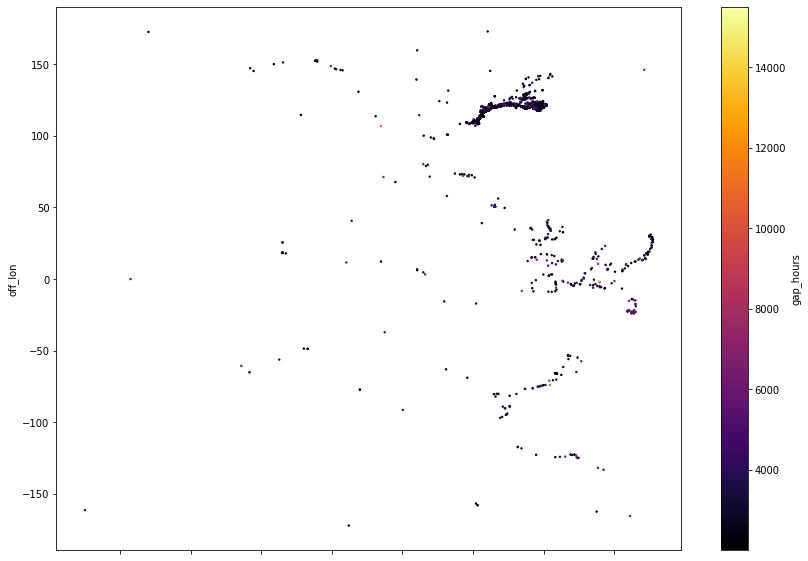

In [21]:
# Where are the boats with the longest gaps

high_gaps = gap_notreg[gap_notreg['gap_hours'] > 2000]

high_gaps.plot(kind="scatter", x="off_lat", y="off_lon", c="gap_hours",
                cmap="inferno", figsize=(14, 10), s=2);

In [47]:
gap_notreg.columns

Index(['mmsi', 'gap_hours', 'gap_distance_m', 'gap_implied_speed_knots',
       'positions_per_day', 'vessel_class', 'flag', 'off_timestamp',
       'off_msgid', 'off_lat', 'off_lon', 'off_type', 'off_receiver_type',
       'off_distance_from_shore_m', 'on_timestamp', 'on_msgid', 'on_lat',
       'on_lon', 'on_type', 'on_receiver_type', 'on_distance_from_shore_m'],
      dtype='object')

In [ ]:
# When did the highest number of gap events take place?

In [8]:
# save to csv
gap_notreg.to_csv('./data/gap_notreg.csv', index=False)